1. Імпортуйте бібліотеку pandas як pd. Завантажте два датасети user_data та logs. Перевірте розмір таблиці, типи змінних, наявність пропущених значень, описову статистику.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
user_data_url = 'https://drive.google.com/file/d/1TiyREep3qRVslvVcHxcSWguz26307CSA/view?usp=sharing'
user_data_path = 'https://drive.google.com/uc?id=' + user_data_url.split('/')[-2]
user_data = pd.read_csv(user_data_path)

In [3]:
logs_url = 'https://drive.google.com/file/d/1acjmRizyrpKtZwHT5Q4Uhyk8_XB90mUK/view?usp=sharing'
logs_path = 'https://drive.google.com/uc?id=' + logs_url.split('/')[-2]
logs = pd.read_csv(logs_path)

In [4]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [5]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [8]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [10]:
user_data.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [11]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [12]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [13]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


2. Який клієнт здійснив найбільше успішних операцій? (success == True)

In [14]:
success_number = logs \
    .query('success == True') \
    .groupby(['client'], as_index=False) \
    .agg({'success': 'count'}) \
    .rename(columns={'success': 'success_number'}) \
    .sort_values(['success_number'], ascending = False)


In [15]:
max_success = success_number.success_number.max()

In [16]:
success_number.query('success_number == @max_success') \
            .client \
            .sort_values() \
            .tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

3. З якої платформи здійснюється найбільша кількість успішних операцій?

In [17]:
logs.query('success == True') \
    .platform \
    .value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

4. Якій платформі віддають перевагу преміумним клієнтам?

In [18]:
data = logs.merge(user_data)

In [19]:
data.query('premium == True') \
    .platform \
    .value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

5. Візуалізуйте розподіл віку клієнтів залежно від типу клієнта (преміум чи ні)

<AxesSubplot: xlabel='age', ylabel='Density'>

<Figure size 864x360 with 0 Axes>

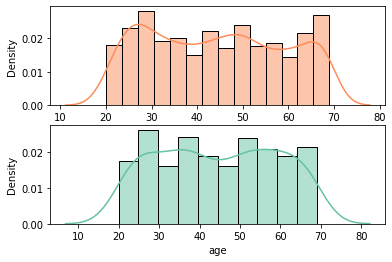

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.histplot(data.query('premium == False').age, ax=ax[0], kde=True, stat='density', kde_kws=dict(cut=3), color='#fc8d59')
sns.histplot(data.query('premium == True').age, ax=ax[1], kde=True, stat='density', kde_kws=dict(cut=3), color='#66c2a4')

6. Побудуйте графік розподілу числа успішних операцій

In [21]:
client_vs_success = data.groupby('client') \
                        .agg({'success': 'sum'})

C:\Users\m.semchenko\AppData\Local\Temp\ipykernel_15848\49053361.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(client_vs_success, kde=False)


<AxesSubplot: >

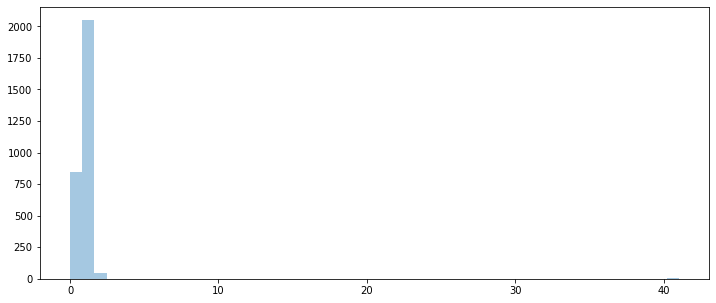

In [22]:
plt.figure(figsize=(12, 5))
sns.distplot(client_vs_success, kde=False)

7. Візуалізуйте число успішних операцій, зроблених на платформі computer, залежно від віку за допомогою sns.countplot (x – вік, y – число успішних операцій). Клієнти якого віку здійснили найбільшу кількість успішних дій?

In [23]:
df = data.query('platform == "computer" and success == True') \
    .groupby('age', as_index=False) \
    .agg({'platform': 'count'})

<AxesSubplot: xlabel='age', ylabel='platform'>

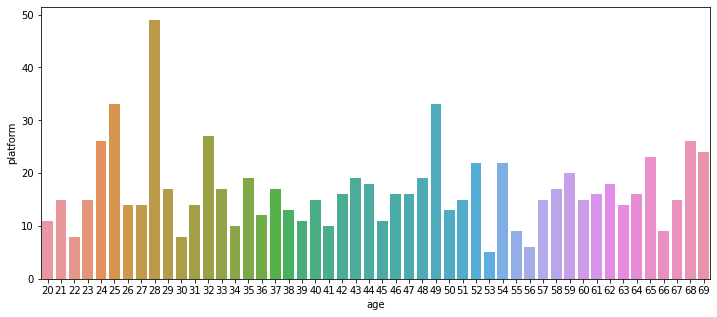

In [24]:
plt.figure(figsize=(12, 5))
sns.barplot(x='age', y='platform', data=df)

In [25]:
computer_success = data.query('platform == "computer" and success == True')

<AxesSubplot: xlabel='age', ylabel='count'>

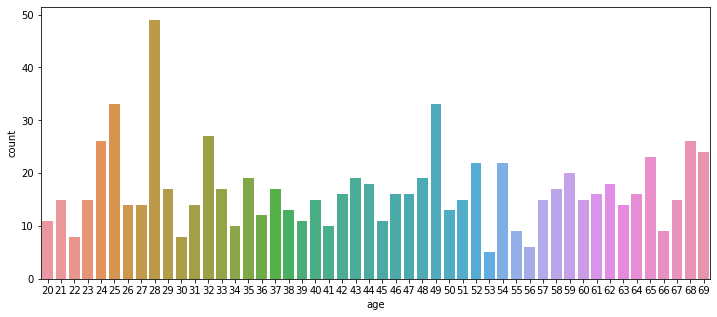

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(data=computer_success, x='age')